<a href="https://colab.research.google.com/github/pinballsurgeon/sweeping_analysis/blob/main/Topic_Matrix_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
import pandas as pd
import nltk
nltk.download('reuters')
from nltk.corpus import reuters
import zipfile


from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import numpy as np


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

[nltk_data] Downloading package reuters to /root/nltk_data...


In [ ]:
# unzip as needed
with zipfile.ZipFile('/root/nltk_data/corpora/reuters.zip', 'r') as zip_ref:
    zip_ref.extractall('/root/nltk_data/corpora')

In [ ]:
data = []
for fileid in reuters.fileids():
    category = reuters.categories(fileid)
    text = reuters.raw(fileid)
    data.append([fileid, category, text])
df_reuters = pd.DataFrame(data, columns=['File ID', 'Category', 'Text'])

In [ ]:
no_topics = 3 
no_top_words = 4
no_top_documents = 3

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import numpy as np

In [ ]:
# convert the 2nd column values to a list
documents = []
for row in data:
  documents.append(row[2])



In [ ]:
def display_topics(H, W, feature_names, documents, no_top_words, no_top_documents):
    for topic_idx, topic in enumerate(H):
        print("Topic %d:" % (topic_idx))
        print(" ".join([ (feature_names[i] + " (" + str(topic[i].round(2)) + ")")
          for i in topic.argsort()[:-no_top_words - 1:-1]]))
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        for doc_index in top_doc_indices:
            print(str(doc_index) + ". " + documents[doc_index])

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# Run NMF
nmf_model = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)
nmf_W = nmf_model.transform(tfidf)
nmf_H = nmf_model.components_

print("NMF Topics")
display_topics(nmf_H, nmf_W, tfidf_feature_names, documents, no_top_words, no_top_documents)
print("--------------")



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,


NMF Topics
Topic 0:
vs (5.52) 000 (3.03) mln (2.9) net (2.64)
9071. BURNUP AND SIMS INC &lt;BSIM> 3RD QTR JAN 31 NET
  Shr profit five cts vs loss 40 cts
      Net profit 669,000 vs loss 4,256,000
      Revs 46.1 mln vs 43.8 mln
      Avg shrs 13.9 mln vs 10.5 mln
      Nine mths
      Shr profit 42 cts vs loss 23 cts
      Net profit 5,529,000 vs loss 2,219,000
      Revs 152.2 mln vs 139.6 mln
      Avg shrs 13.3 mln vs 9,489,000
      NOTE: Current year net both periods includes 1,800,000 dlr
  gain from sale of property.
  


8362. ACADEMY INSURANCE GROUP INC &lt;ACIG> 4TH QTR NET
  Shr profit two cts vs loss 1.05 dlrs
      Net profit 1,666,000 vs loss 18,306,000
      Revs 29.1 mln vs 28.3 mln
      Avg shrs 69.1 mln vs 17.5 mln
      Year
      Shr loss 21 cts vs loss 2.72 dlrs
      Net loss 7,571,000 vs loss 45,517,000
      Revs 117.4 mln vs 123.3 mln
      Avg shrs 35.4 mln vs 16.7 mln
      NOTE: Results include losses of nil vs 473,000 dlrs, or
  three cts a share, in quar

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,


In [ ]:
nmf_W.shape

(10788, 3)

In [ ]:
np.mean( np.array([ nmf_W, nmf_W ]), axis=0 )

array([[0.        , 0.0496297 , 0.        ],
       [0.        , 0.02551571, 0.        ],
       [0.        , 0.02866091, 0.        ],
       ...,
       [0.        , 0.        , 0.09256546],
       [0.05906568, 0.        , 0.00045714],
       [0.05813786, 0.        , 0.01610371]])

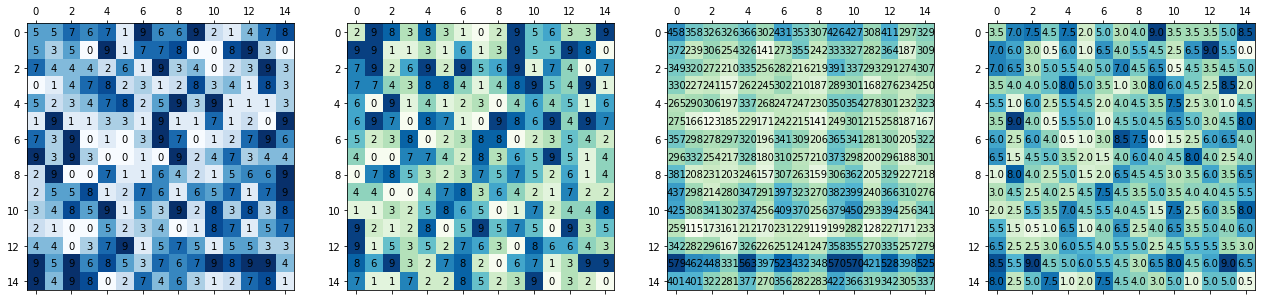

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


fig = plt.figure(figsize=(22, 16))
gs = gridspec.GridSpec(1, 4)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])
#ax4 = plt.subplot(gs[-1, 0])
#ax5 = plt.subplot(gs[-1, -2])

#fig, ax = plt.subplots(2, 2, 2)

#ax_2 = fig.add_subplot(111)

min_val, max_val = 0, 15


arr1 = np.random.randint(0, 10, size=(max_val, max_val))
intersection_matrix = arr1
ax1.matshow(intersection_matrix, cmap=plt.cm.Blues)

arr2 = np.random.randint(0, 10, size=(max_val, max_val))
intersection_matrix_2 = arr2
ax2.matshow(intersection_matrix_2, cmap=plt.cm.GnBu)

arr3 = arr1@arr2
intersection_matrix_3 = arr3
ax3.matshow(intersection_matrix_3, cmap=plt.cm.GnBu)

arr4 = np.mean( np.array([ arr1, arr2 ]), axis=0 )
intersection_matrix_4 = arr4
ax4.matshow(intersection_matrix_4, cmap=plt.cm.GnBu)

for i in range(15):
    for j in range(15):
        c = intersection_matrix[j,i]
        ax1.text(i, j, str(c), va='center', ha='center')

for i in range(15):
    for j in range(15):
        c = intersection_matrix_2[j,i]
        ax2.text(i, j, str(c), va='center', ha='center')

for i in range(15):
    for j in range(15):
        c = intersection_matrix_3[j,i]
        ax3.text(i, j, str(c), va='center', ha='center') 

for i in range(15):
    for j in range(15):
        c = intersection_matrix_4[j,i]
        ax4.text(i, j, str(c), va='center', ha='center')                



In [ ]:
np.arange(50)*2

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])

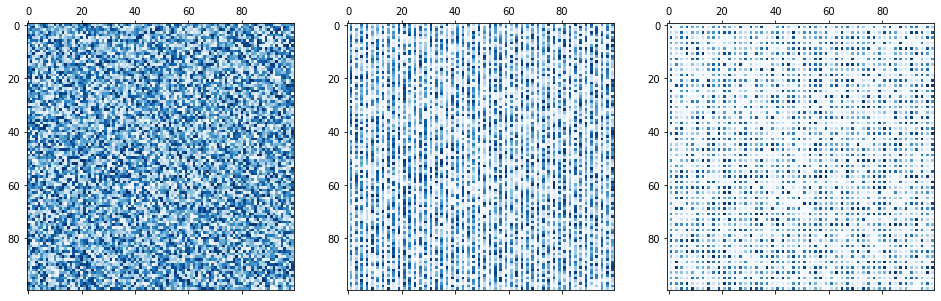

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(22, 16))
gs = gridspec.GridSpec(1, 4)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])


# create 100x100 matrix
X_dense = np.random.rand(100, 100)
ax1.matshow(X_dense, cmap=plt.cm.Blues)


# every other column 0
X_dense[:, 2 * np.arange(50)] = 0
ax2.matshow(X_dense, cmap=plt.cm.Blues)

# print matrix
X_dense[2 * np.arange(50), :] = 0
ax3.matshow(X_dense, cmap=plt.cm.Blues)



In [ ]:

np.random.seed(0)
X_dense = np.random.rand(1000, 1000)
X_dense[:, 2 * np.arange(50)] = 0
X = csr_matrix(X_dense)
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
svd.fit(X)

print(svd.explained_variance_ratio_)
print(svd.explained_variance_ratio_.sum())
print(svd.singular_values_)
print(svd)
print()

X = csr_matrix(X_dense)
svd = TruncatedSVD(n_components=4, n_iter=7, random_state=42)
svd.fit(X)

print(svd.explained_variance_ratio_)
print(svd.explained_variance_ratio_.sum())
print(svd.singular_values_)
print(svd)
print()

X = csr_matrix(X_dense)
svd = TruncatedSVD(n_components=3, n_iter=7, random_state=42)
svd.fit(X)

print(svd.explained_variance_ratio_)
print(svd.explained_variance_ratio_.sum())
print(svd.singular_values_)
print(svd)
print()

X = csr_matrix(X_dense)
svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
svd.fit(X)

print(svd.explained_variance_ratio_)
print(svd.explained_variance_ratio_.sum())
print(svd.singular_values_)
print(svd)
print()

X = csr_matrix(X_dense)
svd = TruncatedSVD(n_components=1, n_iter=7, random_state=42)
svd.fit(X)

print(svd.explained_variance_ratio_)
print(svd.explained_variance_ratio_.sum())
print(svd.singular_values_)
print(svd.algorithm)
print()

[0.00104588 0.00398352 0.00384152 0.00377259 0.00376401]
0.016407518205274935
[487.91212886  17.72795268  17.40029638  17.24176189  17.22185836]
TruncatedSVD(n_components=5, n_iter=7, random_state=42)

[0.00104588 0.00390342 0.00383983 0.00380462]
0.012593751433751556
[487.91212886  17.53523772  17.39391691  17.3135952 ]
TruncatedSVD(n_components=4, n_iter=7, random_state=42)

[0.00104588 0.0038484  0.00381873]
0.00871301764706464
[487.91212886  17.41350037  17.31397627]
TruncatedSVD(n_components=3, n_iter=7, random_state=42)

[0.00104588 0.0038822 ]
0.00492808306715024
[487.91212886  17.49055965]
TruncatedSVD(n_iter=7, random_state=42)

[0.00104588]
0.0010458827747762878
[487.91212886]
randomized



In [ ]:
f=np.diag(svd.singular_values_)

In [ ]:
data = np.random.random(size=(3, 3, 3))

In [ ]:
print(data.shape)
print(arr1.shape)
print(np.mean( np.array([ arr1, arr2 ]), axis=0 ).shape)
print(arr1[:, :, 1])

(3, 3, 3)
(15, 15)
(15, 15)


IndexError: ignored

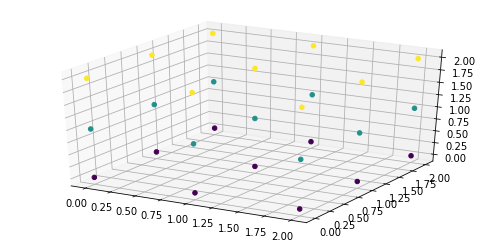

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
data = np.random.random(size=(3, 3, 3))
z, x, y = data.nonzero()
ax.scatter(x, y, z, c=z, alpha=1)
plt.show()

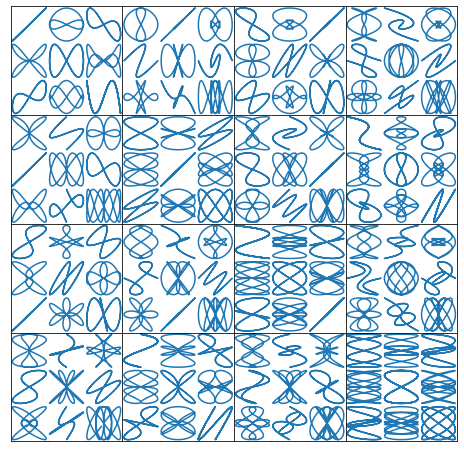

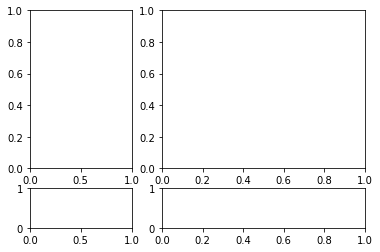

In [ ]:
import numpy as np
from itertools import product


def squiggle_xy(a, b, c, d, i=np.arange(0.0, 2*np.pi, 0.05)):
    return np.sin(i*a)*np.cos(i*b), np.sin(i*c)*np.cos(i*d)

fig = plt.figure(figsize=(8, 8))

# gridspec inside gridspec
outer_grid = gridspec.GridSpec(4, 4, wspace=0.0, hspace=0.0)

for i in range(16):
    inner_grid = gridspec.GridSpecFromSubplotSpec(
      3, 3, subplot_spec=outer_grid[i], wspace=0.0, hspace=0.0)
    a, b = int(i/4)+1, i % 4+1
    for j, (c, d) in enumerate(product(range(1, 4), repeat=2)):
        ax = plt.Subplot(fig, inner_grid[j])
        ax.plot(*squiggle_xy(a, b, c, d))
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)

all_axes = fig.get_axes()

# show only the outside spines
for ax in all_axes:
    for sp in ax.spines.values():
        sp.set_visible(False)
    if ax.is_first_row():
        ax.spines['top'].set_visible(True)
    if ax.is_last_row():
        ax.spines['bottom'].set_visible(True)
    if ax.is_first_col():
        ax.spines['left'].set_visible(True)
    if ax.is_last_col():
        ax.spines['right'].set_visible(True)

plt.show()

# GridSpec with Varying Cell Sizes
# ================================
#
# By default, GridSpec creates cells of equal sizes. You can adjust
# relative heights and widths of rows and columns. Note that absolute
# values are meaningless, only their relative ratios matter.

fig = plt.figure()
gs = gridspec.GridSpec(2, 2,
                       width_ratios=[1, 2],
                       height_ratios=[4, 1]
                       )

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])

In [ ]:
!pip install jupyter-dash

     |████████████████████████████████| 7.3 MB 6.7 MB/s 
     |████████████████████████████████| 26.5 MB 1.4 MB/s 
     |████████████████████████████████| 357 kB 67.3 MB/s 
  Created wheel for dash-core-components: filename=dash_core_components-2.0.0-py3-none-any.whl size=3822 sha256=b5c0400d5b02feca8f7054f97d46162987eee4546642f58a519610fe76d1d4b4
  Stored in directory: /root/.cache/pip/wheels/00/f9/c7/1a6437d794ed753ea9bc9079e761d4fc803a1f1f5d3697b9ec
  Created wheel for dash-html-components: filename=dash_html_components-2.0.0-py3-none-any.whl size=4090 sha256=eacf500cc4009366d75054568679b14dd4071f38918f9754a8407d475cc1506c
  Stored in directory: /root/.cache/pip/wheels/ec/6b/81/05aceabd8b27f724e2c96784016287cc1bfbc349ebfda451de
  Created wheel for dash-table: filename=dash_table-5.0.0-py3-none-any.whl size=3912 sha256=1cdff837adfa3b135e7386a6caf4afe06eb7905e408bbcc7182e5b666e04975d
  Stored in directory: /root/.cache/pip/wheels/85/5d/4e/7c276b57992951dbe770bf5caad6448d0539c510663aef

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`



In [ ]:
np.arange(16,21)

array([16, 17, 18, 19, 20])

In [ ]:
a = np.arange(5) - 1j*np.arange(16,21)
print(a.shape)
print(a)

(5,)
[0.-16.j 1.-17.j 2.-18.j 3.-19.j 4.-20.j]


In [ ]:
def argand(a):
    import matplotlib.pyplot as plt
    import numpy as np
    #for x in range(len(a)):
    #    plt.plot([0,a[x].real],[0,a[x].imag],'ro-',label='python')
    for x in a:
        plt.polar([0,np.angle(x)],[0,abs(x)],marker='o')        
    limit=np.max(np.ceil(np.absolute(a))) # set limits for axis
    plt.xlim((-limit,limit))
    plt.ylim((-limit,limit))
    plt.ylabel('Imaginary')
    plt.xlabel('Real')
    plt.show()

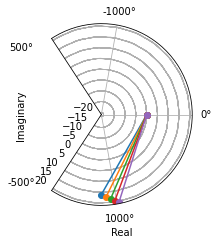

In [ ]:
#fig,ax = plt.subplots()
#a = np.arange(5) + 1j*np.arange(6,11)
#ax.scatter(a.real,a.imag)
argand(a)

In [ ]:
b

In [ ]:
df = pd.read_csv("repo_study_v1.csv")

In [ ]:
df

,repo
0,"""Requests HTTP Library\nRequests is an HTTP li..."
1,"""requests.adapters\n~~~~~~~~~~~~~~~~~\nThis mo..."
2,requests.api\n~~~~~~~~~~~~\nThis module implem...
3,"""requests.auth\n~~~~~~~~~~~~~\nThis module con..."
4,"""requests.compat\n~~~~~~~~~~~~~~~\nThis module..."
5,"""requests.cookies\n~~~~~~~~~~~~~~~~\nCompatibi..."
6,"""from __future__ import print_function\n\nimpo..."
7,"""requests.hooks\n~~~~~~~~~~~~~~\nThis module p..."
8,"""requests.models\n~~~~~~~~~~~~~~~\nThis module..."
9,"""import sys\n\ntry:\n import chardet\nexcep..."


Loading dataset...
done in 1.437s.
Extracting tf-idf features for NMF...
done in 0.019s.
Extracting tf features for LDA...
done in 0.016s.

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.022s.


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


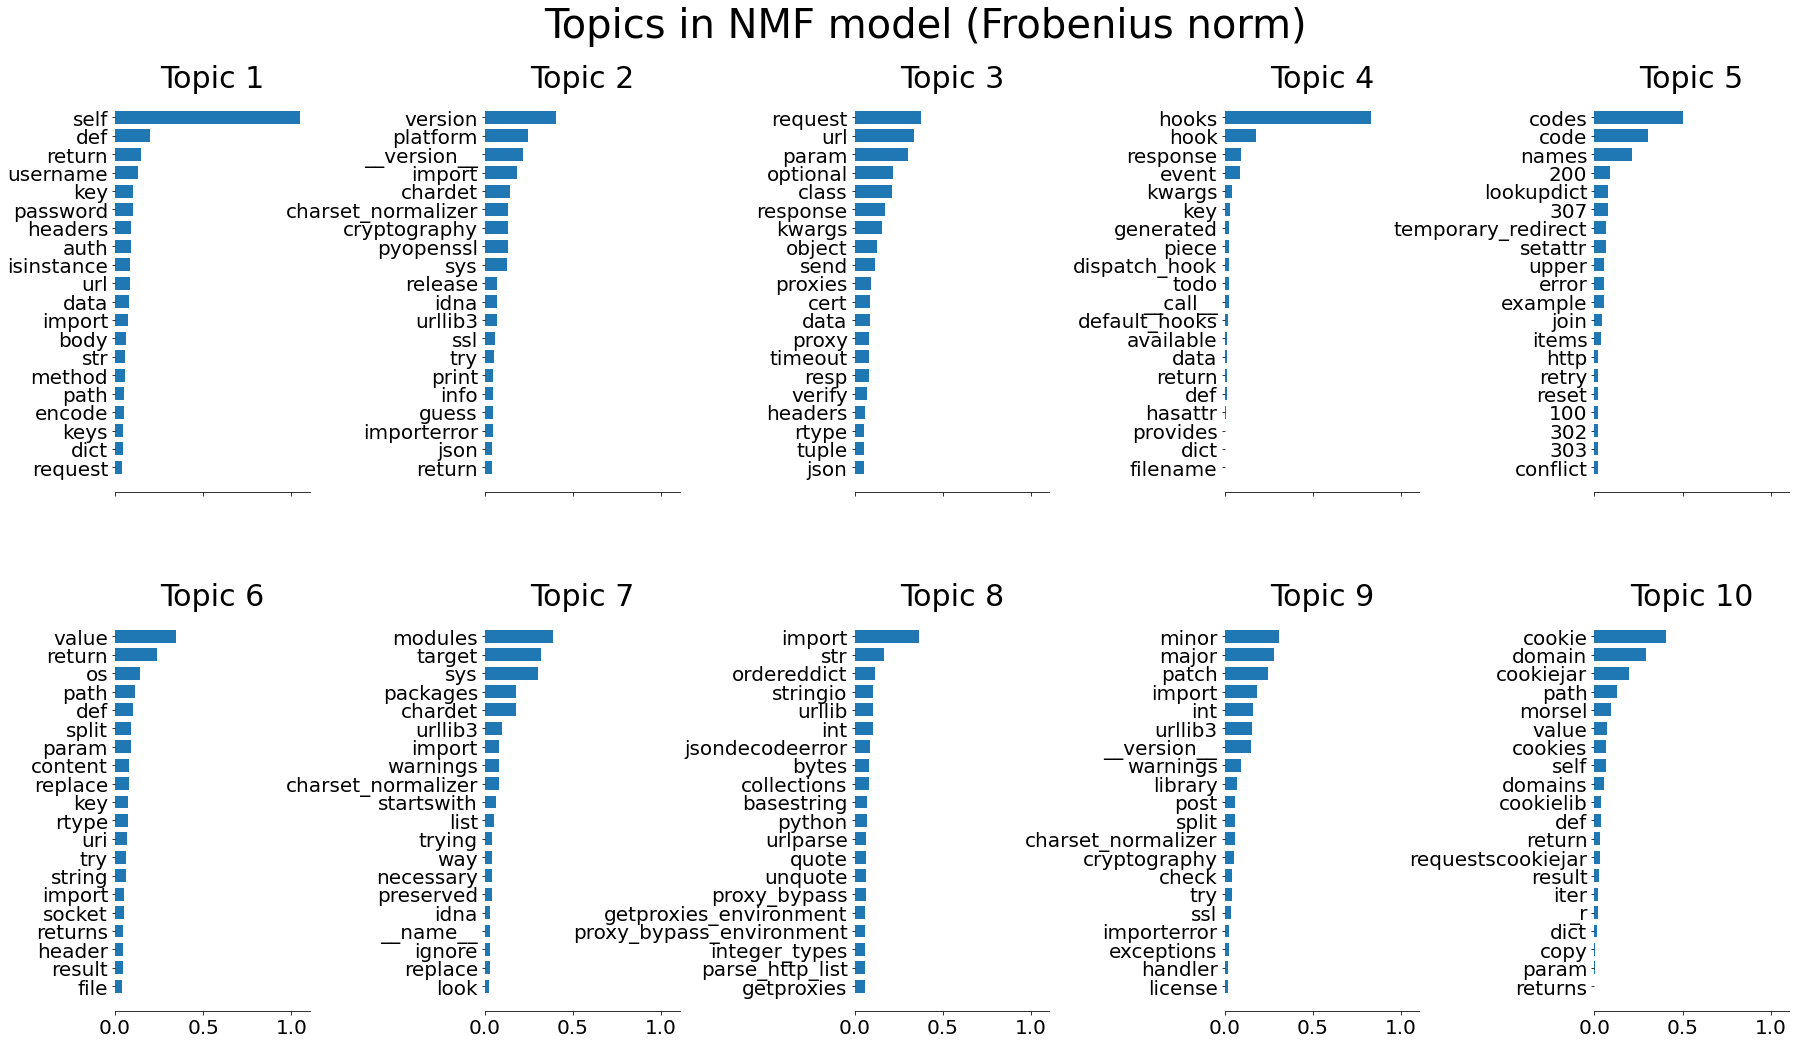



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.143s.


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


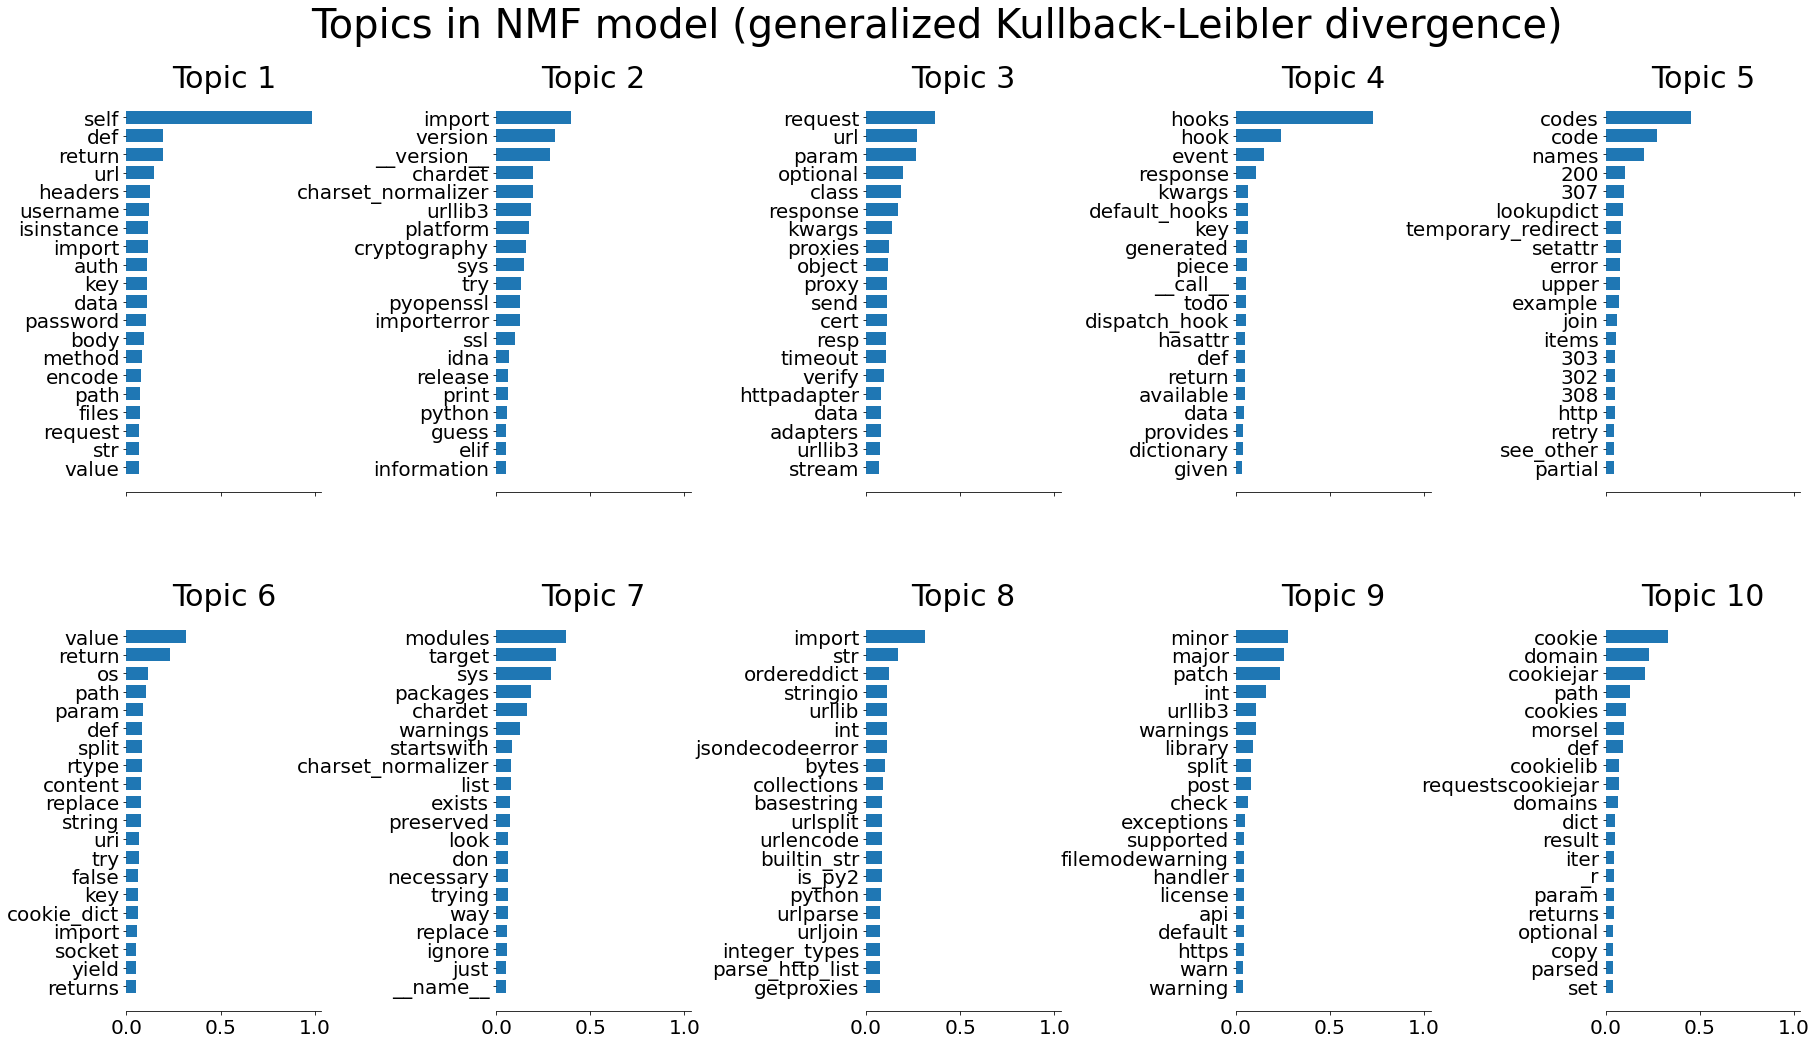



 Fitting LDA models with tf features, n_samples=2000 and n_features=1000...
done in 0.084s.


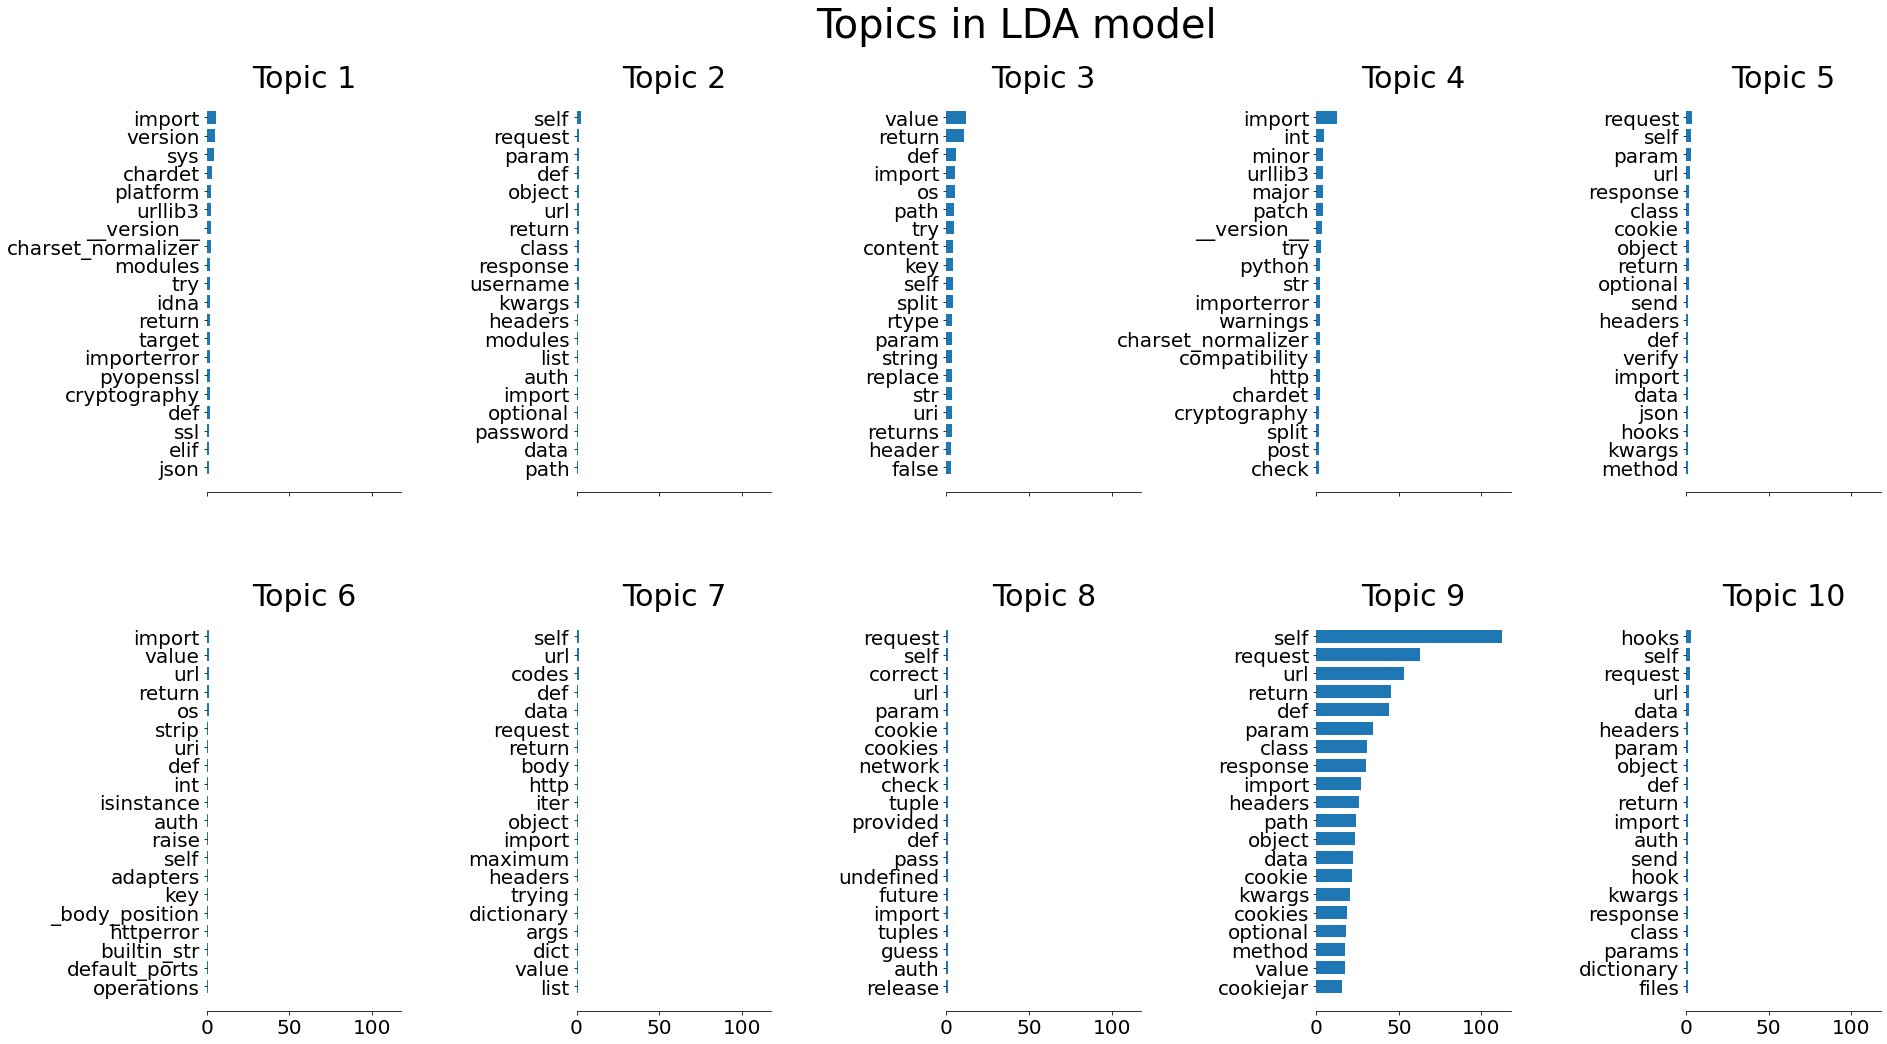

In [ ]:

from time import time
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20


def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


# Load the 20 newsgroups dataset and vectorize it. We use a few heuristics
# to filter out useless terms early on: the posts are stripped of headers,
# footers and quoted replies, and common English words, words occurring in
# only one document or in at least 95% of the documents are removed.

print("Loading dataset...")
t0 = time()
data, _ = fetch_20newsgroups(
    shuffle=True,
    random_state=1,
    remove=("headers", "footers", "quotes"),
    return_X_y=True,
)
data_samples = df["repo"]
print("done in %0.3fs." % (time() - t0))

# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print()

# Fit the NMF model
print(
    "Fitting the NMF model (Frobenius norm) with tf-idf features, "
    "n_samples=%d and n_features=%d..." % (n_samples, n_features)
)
t0 = time()
nmf = NMF(n_components=n_components, random_state=1, alpha=0.1, l1_ratio=0.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))


tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf, tfidf_feature_names, n_top_words, "Topics in NMF model (Frobenius norm)"
)

# Fit the NMF model
print(
    "\n" * 2,
    "Fitting the NMF model (generalized Kullback-Leibler "
    "divergence) with tf-idf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=1,
    beta_loss="kullback-leibler",
    solver="mu",
    max_iter=1000,
    alpha=0.1,
    l1_ratio=0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in NMF model (generalized Kullback-Leibler divergence)",
)

print(
    "\n" * 2,
    "Fitting LDA models with tf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

data = df

In [ ]:
def clean_sentence(val):
    "remove chars that are not letters or numbers, downcase, then remove stop words"
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub(' ', val).lower()
    sentence = sentence.replace('\n', ' ')
    sentence = sentence.split(" ")
    
   # for word in list(sentence):
   #     if word in STOP_WORDS:
   #         sentence.remove(word)  
            
    sentence = " ".join(sentence)
    return sentence

def clean_dataframe(data):
    "drop nans, then apply 'clean_sentence' function to question1 and 2"
    data = data.dropna(how="any")
    
    for col in ['repo']:
        data[col] = data[col].apply(clean_sentence)
    
    return data

data = clean_dataframe(data)
data.head(5)

,repo
0,requests http library requests is an http libr...
1,requestsadapters this module contains the tra...
2,requestsapi this module implements the reques...
3,requestsauth this module contains the authent...
4,requestscompat this module handles import com...


In [ ]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in data:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus

#corpus = data
corpus = build_corpus(data)        
corpus[0:2]

[['requests',
  'http',
  'library',
  'requests',
  'is',
  'an',
  'http',
  'library',
  'written',
  'in',
  'python',
  'for',
  'human',
  'beings',
  'basic',
  'get',
  'usage',
  '',
  '',
  '',
  '',
  'import',
  'requests',
  '',
  '',
  '',
  '',
  'r',
  '',
  'requestsgethttpswwwpythonorg',
  '',
  '',
  '',
  '',
  'rstatuscode',
  '',
  '',
  '',
  '200',
  '',
  '',
  '',
  '',
  'bpython',
  'is',
  'a',
  'programming',
  'language',
  'in',
  'rcontent',
  '',
  '',
  '',
  'true',
  '',
  'or',
  'post',
  '',
  '',
  '',
  '',
  'payload',
  '',
  'dictkey1value1',
  'key2value2',
  '',
  '',
  '',
  '',
  'r',
  '',
  'requestsposthttpshttpbinorgpost',
  'datapayload',
  '',
  '',
  '',
  '',
  'printrtext',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  'form',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  'key1',
  'value1',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  'key2',
  'value2',
  '',
  '',
  '',
  '',


In [145]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=20, workers=4)
#model.wv['one']

In [147]:
model.wv.most_similar('import')
model

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `syn0_lockf` (Attribute will be removed in 4.0.0, use self.trainables.vectors_lockf instead).
  


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.], dtype=float32)

In [ ]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     fontsize=20,
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


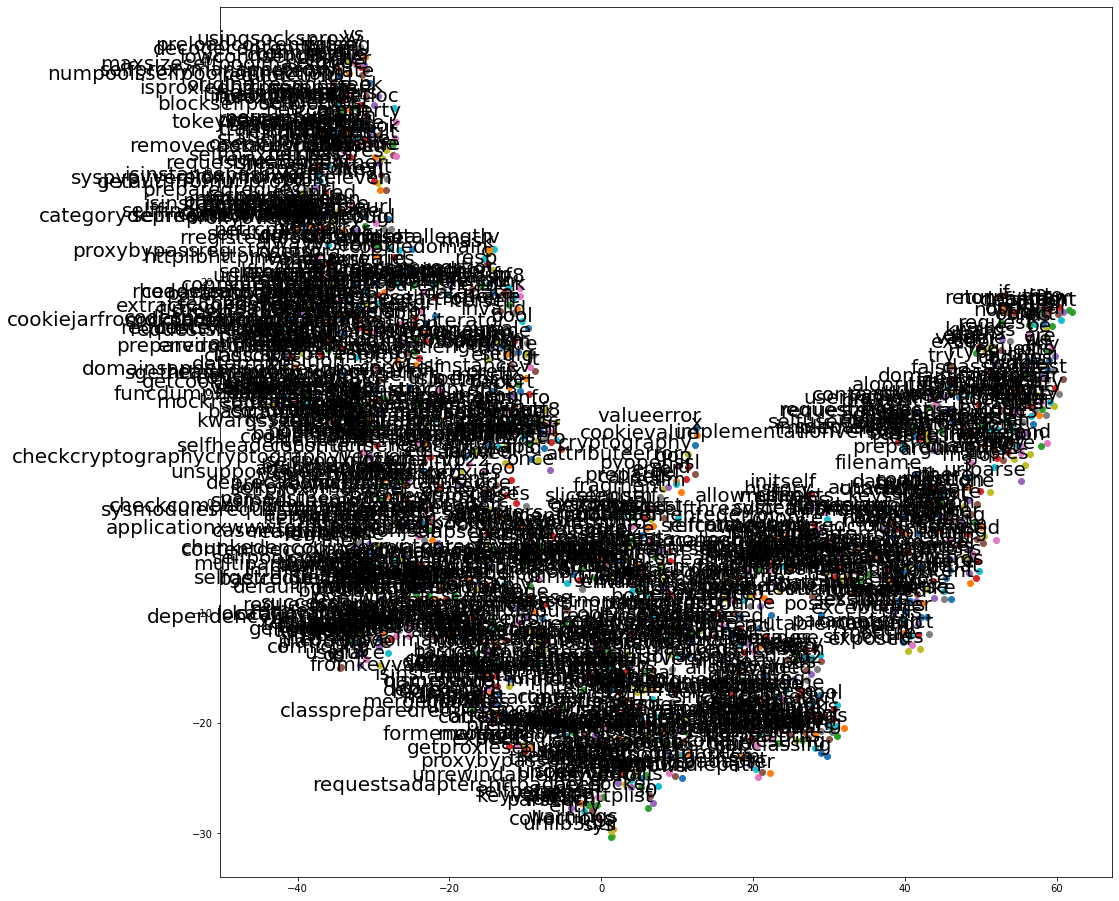

In [ ]:
tsne_plot(model)